# Geochronology

This jupyter notebook (Python 3 kernel) plots the $^{206}$Pb/$^{238}$U date and 2$\sigma$ uncertainties of individual zircons collected from the Tambien Group of Ethiopia.

<h2>Table of Contents<span class="tocSkip"></span></h2>
<div class="toc"><ul class="toc-item"><li><span><a href="#Standard-Modules" data-toc-modified-id="Standard-Modules-1">Standard Modules</a></span></li><li><span><a href="#Plotting-Function" data-toc-modified-id="Plotting-Function-2">Plotting Function</a></span></li><li><span><a href="#All-Ethiopia-Dates" data-toc-modified-id="All-Ethiopia-Dates-3">All Ethiopia Dates</a></span></li><li><span><a href="#Dates-for-Park-et-al.-(2018)-only" data-toc-modified-id="Dates-for-Park-et-al.-(2018)-only-4">Dates for Park et al. (2018) only</a></span></li></ul></div>

## Standard Modules

Import standard modules included in most Python 3 distributions:

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

## Plotting Function

This function generates the date distribution plots:

In [2]:
def plot_dates(zircon_means, zircon_2sigmas, include, sample_means, sample_2sigmas, colours, labels,\
               legend=True, figsize=None, ylim=None, lineweight=None, bbox_to_anchor=None, mean_box=None):
    """
    Make a date distribution plot.
    
    Parameters
    ----------
    zircon_means : list of numpy arrays
        individual zircon mean dates (each array being a sample, and each element of that array being a zircon)
    
    zircon_2sigmas : list of numpy arrays
        individual zircon 2 sigmas (each array being a sample, and each element of that array being a zircon)
        
    include : list of lists
        'yes' or 'no' for inclusion of individual zircon in mean (each array being a sample, and each element of
        that array being a zircon)
        
    sample_means : list
        sample mean dates (each element being a sample)
        
    sample_2sigmas : list
        sample 2 sigmas (each element being a sample)
        
    colours : list
        sample colours for plotting (each element being a sample)
        
    labels : list
        sample labels for the legend (each element being a sample)
        
    legend : boolean
        if True, plot legend (default True, optional)
        
    figsize : tuple
        figure size (default None, optional)
        
    ylim : tuple
        figure y limits (default None, optional)
        
    lineweight : float
        line weight for individual zircons (default None, optional)
        
    bbox_to_anchor : tuple
        for manual placement of the legend (default None, optional)
        
    mean_box : list
        booleans, for decided whether to draw the mean and 2 sigma for a sample (default None, optional)
        
    Returns
    -------
    fig : figure handle
    
    ax : axis handle
    """
    # formatting constants
    zircon_spacing = 1
    sample_spacing = 6 - zircon_spacing
    start_x = 3
    yes_alpha = 0.8
    no_alpha = 0.2
    if lineweight==None:
        lineweight=3
    
    # initialize current x
    current_x = start_x
    
    # number of samples
    n_samples = len(zircon_means)
    
    # plot
    if figsize == None:
        fig, ax = plt.subplots()
    else:
        fig, ax = plt.subplots(figsize=figsize)
    
    # iterate over each sample
    plot_mean_box = False
    for i in range(n_samples):
        
        # number of zircons in sample
        n_zircons = len(zircon_means[i])
        
        # check if we need to plot the mean box
        if mean_box==None:
            plot_mean_box = True
        elif mean_box[i]:
            plot_mean_box = True
        
        # iterate over each zircon to find the mean box coordinates
        if plot_mean_box:
            start_box = False
            end_box = False
            for j in range(n_zircons):
                if include[i][j] == 'yes' and start_box == False:
                    start_box_x = current_x + j*zircon_spacing - zircon_spacing/2
                    start_box = True
                if include[i][j] == 'no' and start_box == True and end_box == False:
                    end_box_x = current_x + (j-1)*zircon_spacing + zircon_spacing/2
                    end_box = True
            if end_box == False:
                end_box_x = current_x + (n_zircons-1)*zircon_spacing + zircon_spacing/2

            # plot the mean box
            # the 2sigma uncertainty on the sample age
            if sample_2sigmas != None:
                rectangle = matplotlib.patches.Rectangle((start_box_x, sample_means[i]-sample_2sigmas[i]),
                                                         (end_box_x-start_box_x), sample_2sigmas[i]*2, color='C7')
                ax.add_patch(rectangle)

            # the mean age
            if sample_means != None:
                ax.hlines(sample_means[i], start_box_x, end_box_x)
        
        # iterate over each zircon to plot the zircons
        marked = False # legend control
        for j in range(n_zircons):
            
            if marked:
                if include[i][j] == 'yes':
                    ax.vlines(current_x,
                              zircon_means[i][j]-zircon_2sigmas[i][j],
                              zircon_means[i][j]+zircon_2sigmas[i][j],
                              colors=colours[i], lw=lineweight, alpha=yes_alpha)
                else:
                    ax.vlines(current_x,
                              zircon_means[i][j]-zircon_2sigmas[i][j],
                              zircon_means[i][j]+zircon_2sigmas[i][j],
                              colors=colours[i], lw=lineweight, alpha=no_alpha)
            else:
                if include[i][j] == 'yes':
                    ax.vlines(current_x,
                              zircon_means[i][j]-zircon_2sigmas[i][j],
                              zircon_means[i][j]+zircon_2sigmas[i][j],
                              colors=colours[i], lw=lineweight, alpha=yes_alpha, label=labels[i])
                    marked = True
                else:
                    ax.vlines(current_x,
                              zircon_means[i][j]-zircon_2sigmas[i][j],
                              zircon_means[i][j]+zircon_2sigmas[i][j],
                              colors=colours[i], lw=lineweight, alpha=no_alpha)
                
            # tick the x to the next zircon
            current_x = current_x + zircon_spacing
        
        # tick the x to the next sample
        current_x = current_x + sample_spacing
        
    # prettify
    ax.invert_yaxis()
    ax.set_ylabel('$^{206}$Pb/$^{238}$U date [Ma]')
    if legend:
        if bbox_to_anchor == None:
            ax.legend(bbox_to_anchor=(1.8,1), fontsize=12)
        else:
            ax.legend(bbox_to_anchor=bbox_to_anchor, fontsize=12)
    if ylim != None:
        ax.set_ylim(ylim)
        
    return fig, ax

## All Ethiopia Dates

Plot all geochronologic samples collected from Ethiopia so far.

Import the data:

In [3]:
# Park et al. (2018)
T39_420_2Z = pd.read_csv('Data/T39-420_2Z.csv')
T39_108_0Z = pd.read_csv('Data/T39-108_0Z.csv')
T1b_439_8Z = pd.read_csv('Data/T1b-439_8Z.csv')

# MacLennan et al. (2018)
SAM_ET_03 = pd.read_csv('Data/SAM-ET-03.csv')
SAM_ET_04 = pd.read_csv('Data/SAM-ET-04.csv')
T46_102_2Z = pd.read_csv('Data/T46-102_2Z.csv')

# Swanson-Hysell et al. (2015)
T1_12_3 = pd.read_csv('Data/T1-12_3.csv')
T1_1202 = pd.read_csv('Data/T1-1202.csv')
T2 = pd.read_csv('Data/T2.csv')
T22_453 = pd.read_csv('Data/T22-453.csv')
TS22 = pd.read_csv('Data/TS22.csv')
TS23 = pd.read_csv('Data/TS23.csv')

# sort
T39_420_2Z.sort_values(by=['include','206Pb/238U'], ascending=[False, True], inplace=True)
T39_108_0Z.sort_values(by=['include','206Pb/238U'], ascending=[False, True], inplace=True)
T1b_439_8Z.sort_values(by=['include','206Pb/238U'], ascending=[False, True], inplace=True)
SAM_ET_03.sort_values(by=['include','206Pb/238U'], ascending=[False, True], inplace=True)
SAM_ET_04.sort_values(by=['include','206Pb/238U'], ascending=[False, True], inplace=True)
T46_102_2Z.sort_values(by=['include','206Pb/238U'], ascending=[False, True], inplace=True)
T1_12_3.sort_values(by=['include','206Pb/238U'], ascending=[False, True], inplace=True)
T1_1202.sort_values(by=['include','206Pb/238U'], ascending=[False, True], inplace=True)
T2.sort_values(by=['include','206Pb/238U'], ascending=[False, True], inplace=True)
T22_453.sort_values(by=['include','206Pb/238U'], ascending=[False, True], inplace=True)
TS22.sort_values(by=['include','206Pb/238U'], ascending=[False, True], inplace=True)
TS23.sort_values(by=['include','206Pb/238U'], ascending=[False, True], inplace=True)

T39_420_2Z.reset_index(inplace=True, drop=True)
T39_108_0Z.reset_index(inplace=True, drop=True)
T1b_439_8Z.reset_index(inplace=True, drop=True)
SAM_ET_03.reset_index(inplace=True, drop=True)
SAM_ET_04.reset_index(inplace=True, drop=True)
T46_102_2Z.reset_index(inplace=True, drop=True)
T1_12_3.reset_index(inplace=True, drop=True)
T1_1202.reset_index(inplace=True, drop=True)
T2.reset_index(inplace=True, drop=True)
T22_453.reset_index(inplace=True, drop=True)
TS22.reset_index(inplace=True, drop=True)
TS23.reset_index(inplace=True, drop=True)

Pull out/define the necessary variables:

In [4]:
zircon_means = [T39_420_2Z['206Pb/238U'],
                T39_108_0Z['206Pb/238U'],
                T1b_439_8Z['206Pb/238U'],
                SAM_ET_03['206Pb/238U'],
                SAM_ET_04['206Pb/238U'],
                T46_102_2Z['206Pb/238U'],
                T1_12_3['206Pb/238U'],
                T1_1202['206Pb/238U'],
                T2['206Pb/238U'],
                T22_453['206Pb/238U'],
                TS22['206Pb/238U'],
                TS23['206Pb/238U']]
zircon_2sigmas = [T39_420_2Z['206Pb/238U_2sigma'],
                  T39_108_0Z['206Pb/238U_2sigma'],
                  T1b_439_8Z['206Pb/238U_2sigma'],
                  SAM_ET_03['206Pb/238U_2sigma'],
                  SAM_ET_04['206Pb/238U_2sigma'],
                  T46_102_2Z['206Pb/238U_2sigma'],
                  T1_12_3['206Pb/238U_2sigma'],
                  T1_1202['206Pb/238U_2sigma'],
                  T2['206Pb/238U_2sigma'],
                  T22_453['206Pb/238U_2sigma'],
                  TS22['206Pb/238U_2sigma'],
                  TS23['206Pb/238U_2sigma']]
include = [T39_420_2Z['include'],
           T39_108_0Z['include'],
           T1b_439_8Z['include'],
           SAM_ET_03['include'],
           SAM_ET_04['include'],
           T46_102_2Z['include'],
           T1_12_3['include'],
           T1_1202['include'],
           T2['include'],
           T22_453['include'],
           TS22['include'],
           TS23['include']]
sample_means = [794.28,
                795.59,
                823.2,
                719.58,
                719.68,
                735.25,
                821.2,
                787.38,
                788.72,
                776.9,
                815.29,
                794.2]
sample_2sigmas = [0.44,
                  0.82,
                  1.1,
                  0.56,
                  0.46,
                  0.25,
                  1.5,
                  0.14,
                  0.24,
                  0.8,
                  0.32,
                  0.7]
colours = plt.cm.viridis(np.linspace(0,1,len(sample_means)))
labels = ['T39-420.2Z - this study',
          'T39-108.0Z - this study',
          'T1b-439.8Z - this study',
          'SAM-ET-03 - MacLennan et al. (2018)',
          'SAM-ET-04 - MacLennan et al. (2018)',
          'T46-102.2Z - MacLennan et al. (2018)',
          'T1-12.3 - Swanson-Hysell et al. (2015)',
          'T1-1202 - Swanson-Hysell et al. (2015)',
          'T2 - Swanson-Hysell et al. (2015)',
          'T22-453 - Swanson-Hysell et al. (2015)',
          'TS22 - Swanson-Hysell et al. (2015)',
          'TS23 - Swanson-Hysell et al. (2015)']

Plot:

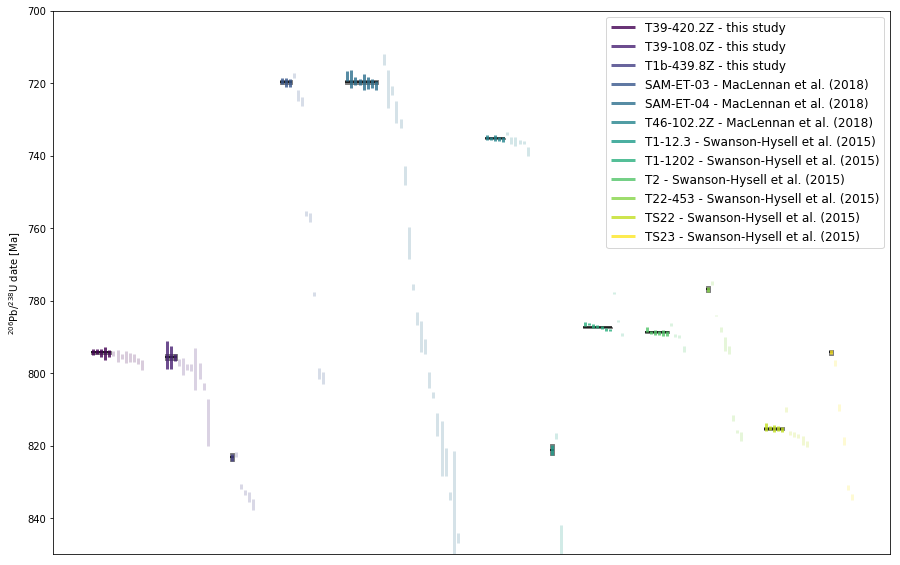

In [5]:
fig, ax = plot_dates(zircon_means, zircon_2sigmas, include, sample_means, sample_2sigmas, colours, labels,\
                     figsize=(15,10), lineweight=3, bbox_to_anchor=(1,1), ylim=(850,700))
ax.set_xticks([])
plt.show(fig)

## Dates for Park et al. (2018) only

This code produces Figure 6 in the manuscript:

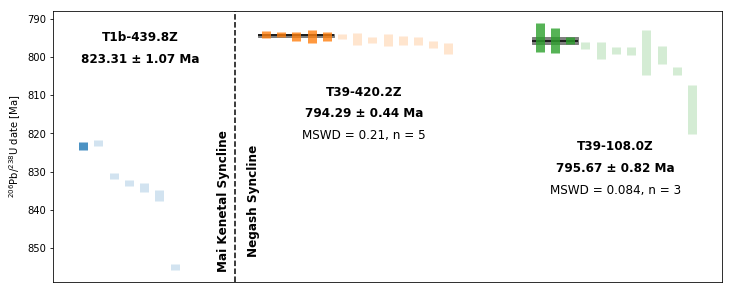

In [6]:
zircon_means = [T1b_439_8Z['206Pb/238U'],
                T39_420_2Z['206Pb/238U'],
                T39_108_0Z['206Pb/238U']]
zircon_2sigmas = [T1b_439_8Z['206Pb/238U_2sigma'],
                  T39_420_2Z['206Pb/238U_2sigma'],
                  T39_108_0Z['206Pb/238U_2sigma']]
include = [T1b_439_8Z['include'],
           T39_420_2Z['include'],
           T39_108_0Z['include']]
sample_means = [823.31, 794.29, 795.67]
sample_2sigmas = [1.07, 0.44, 0.82]
colours = ['C0', 'C1', 'C2']
labels = ['T1b-439.8Z', 'T39-420.2Z', 'T39-108.0Z']

fig, ax = plot_dates(zircon_means, zircon_2sigmas, include, sample_means, sample_2sigmas, colours, labels,
                     legend=False, lineweight=9, figsize=(12,5), mean_box=[False,True,True])
ax.set_xticks([])

ax.text(0.13, 0.9,'T1b-439.8Z',
        fontsize=12,weight='bold',horizontalalignment='center',verticalalignment='center',transform=ax.transAxes)
ax.text(0.13, 0.82,'823.31 ± 1.07 Ma',
        fontsize=12,weight='bold',horizontalalignment='center',verticalalignment='center',transform=ax.transAxes)

ax.text(0.465, 0.7,'T39-420.2Z',
        fontsize=12,weight='bold',horizontalalignment='center',verticalalignment='center',transform=ax.transAxes)
ax.text(0.465, 0.62,'794.29 ± 0.44 Ma',
        fontsize=12,weight='bold',horizontalalignment='center',verticalalignment='center',transform=ax.transAxes)
ax.text(0.465, 0.54,'MSWD = 0.21, n = 5',
        fontsize=12,horizontalalignment='center',verticalalignment='center',transform=ax.transAxes)

ax.text(0.84, 0.5,'T39-108.0Z',
        fontsize=12,weight='bold',horizontalalignment='center',verticalalignment='center',transform=ax.transAxes)
ax.text(0.84, 0.42,'795.67 ± 0.82 Ma',
        fontsize=12,weight='bold',horizontalalignment='center',verticalalignment='center',transform=ax.transAxes)
ax.text(0.84, 0.34,'MSWD = 0.084, n = 3',
        fontsize=12,horizontalalignment='center',verticalalignment='center',transform=ax.transAxes)

ax.axvline(13, ls='--', c='k')
ax.text(0.255, 0.3,'Mai Kenetal Syncline',rotation=90,
        fontsize=12,weight='bold',horizontalalignment='center',verticalalignment='center',transform=ax.transAxes)
ax.text(0.3, 0.3,'Negash Syncline',rotation=90,
        fontsize=12,weight='bold',horizontalalignment='center',verticalalignment='center',transform=ax.transAxes)

#plt.savefig('../../Manuscript/Figures/Geochronology.pdf', bbox_inches='tight')
plt.show(fig)